<a href="https://colab.research.google.com/github/Zainab-Aijaz/Data-Science-project/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Apple Stock Price Dataset

# Load Dataset

In [ ]:
df = pd.read_csv('/content/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10831,2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200
10832,2023-11-30,189.839996,190.320007,188.190002,189.949997,189.949997,48794400
10833,2023-12-01,190.330002,191.559998,189.229996,191.240005,191.240005,45679300
10834,2023-12-04,189.979996,190.050003,187.449997,189.429993,189.429993,43389500
10835,2023-12-05,190.210007,194.399994,190.179993,193.419998,193.419998,66371700


 # Count Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10836 entries, 0 to 10835
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10836 non-null  object 
 1   Open       10836 non-null  float64
 2   High       10836 non-null  float64
 3   Low        10836 non-null  float64
 4   Close      10836 non-null  float64
 5   Adj Close  10836 non-null  float64
 6   Volume     10836 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 592.7+ KB


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


 # Exploratoty Data Analysis(EDA)

# Data Cleaning

In [ ]:
# Standardize Column Names
df.columns=(
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)
# remove Duplicate Rows
df.drop_duplicates(inplace=True)
df.head()

,date,open,high,low,close,adj_close,volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600


In [ ]:
df.shape

(10836, 7)

In [ ]:
df=df.drop(['adj_close'], axis=1)

In [ ]:

df.head()

,date,open,high,low,close,volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600


In [ ]:
df.sample(333)

,date,open,high,low,close,adj_close,volume
8435,2014-05-23,21.687500,21.954643,21.659643,21.933214,19.451807,232209600
5470,2002-08-13,0.266071,0.271607,0.259821,0.260536,0.220851,269869600
931,1984-08-17,0.125558,0.126116,0.121094,0.122768,0.095001,153932800
9567,2018-11-19,47.500000,47.674999,46.247501,46.465000,44.597614,167701200
56,1981-03-05,0.116071,0.116071,0.115513,0.115513,0.089387,5376000
...,...,...,...,...,...,...,...
3010,1992-11-06,0.488839,0.504464,0.488839,0.497768,0.405520,263972800
4938,2000-06-27,0.960379,0.991071,0.921875,0.924107,0.783347,203470400
2223,1989-09-28,0.401786,0.408482,0.401786,0.406250,0.320963,79419200
3251,1993-10-21,0.245536,0.279018,0.243304,0.270089,0.222421,627110400


In [ ]:
df.tail()

,date,open,high,low,close,adj_close,volume
10831,2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200
10832,2023-11-30,189.839996,190.320007,188.190002,189.949997,189.949997,48794400
10833,2023-12-01,190.330002,191.559998,189.229996,191.240005,191.240005,45679300
10834,2023-12-04,189.979996,190.050003,187.449997,189.429993,189.429993,43389500
10835,2023-12-05,190.210007,194.399994,190.179993,193.419998,193.419998,66371700


In [ ]:
# Handle missing value
df.fillna(method='ffill', inplace=True)


/tmp/ipython-input-4189208426.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


 # Data Visualization

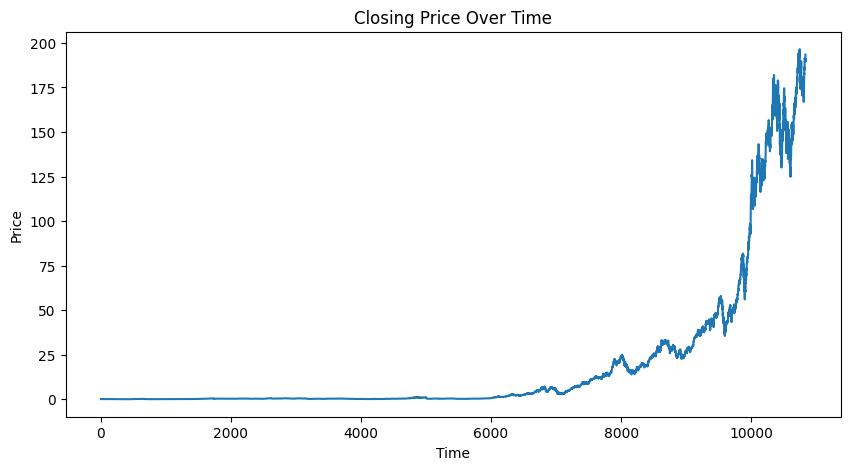

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['close'])
plt.title("Closing Price Over Time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()


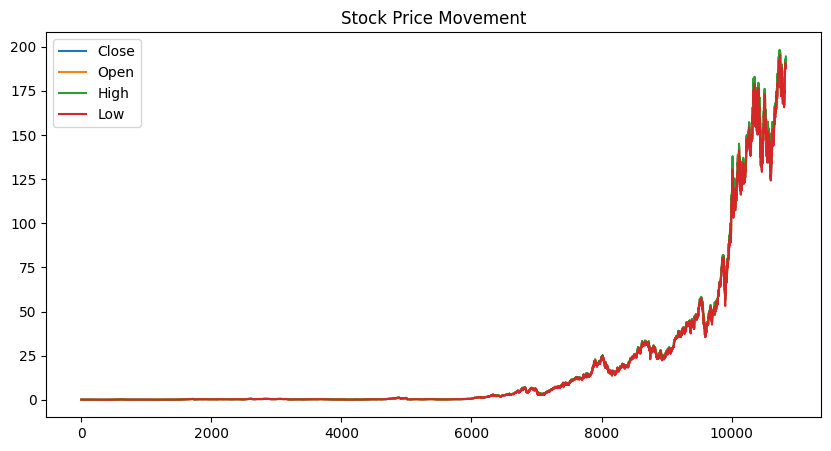

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['close'], label='Close')
plt.plot(df['open'], label='Open')
plt.plot(df['high'], label='High')
plt.plot(df['low'], label='Low')

plt.legend()
plt.title("Stock Price Movement")
plt.show()


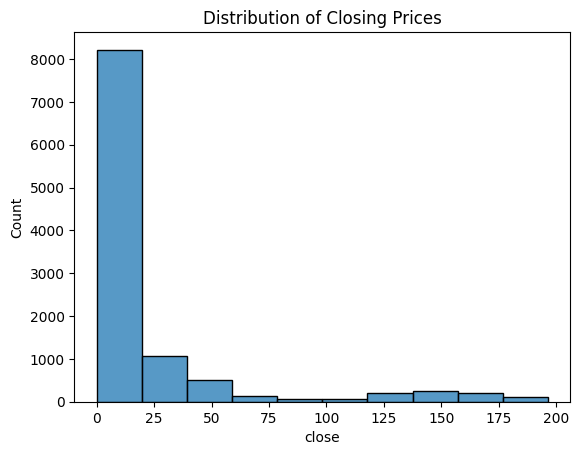

In [ ]:
sns.histplot(df['close'], bins=10)
plt.title("Distribution of Closing Prices")
plt.show()


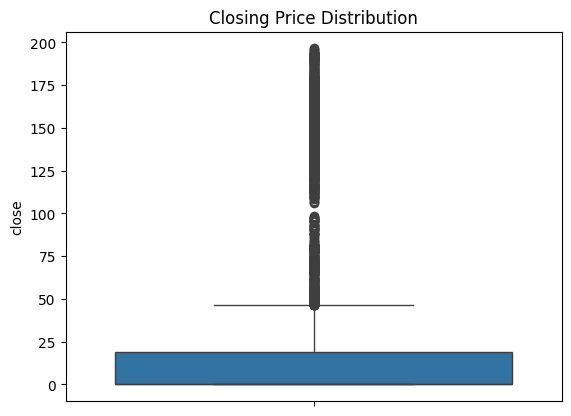

In [ ]:
sns.boxplot(y=df['close'])
plt.title("Closing Price Distribution")
plt.show()


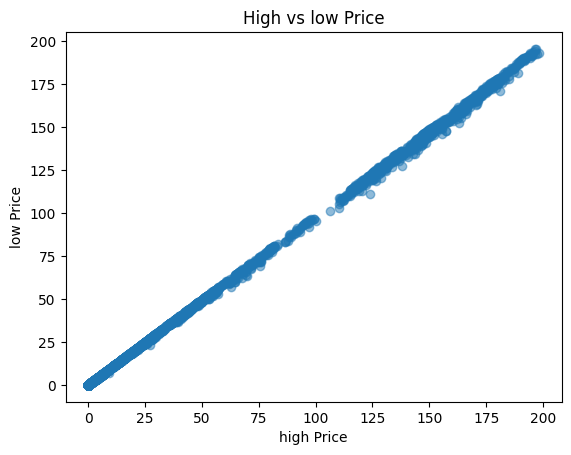

In [ ]:
plt.scatter(df['high'], df['low'], alpha=0.5)
plt.xlabel("high Price")
plt.ylabel("low Price")
plt.title("High vs low Price")
plt.show()

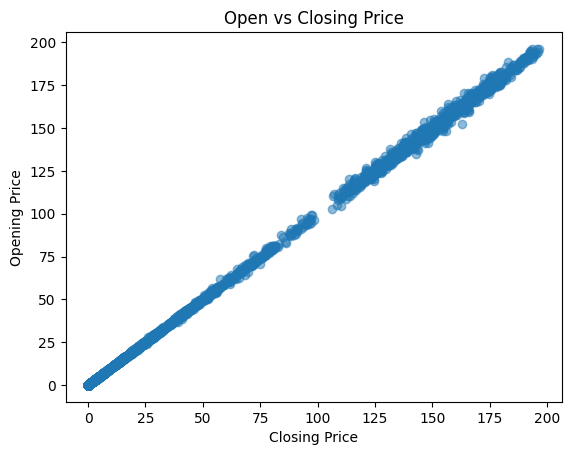

In [ ]:
plt.scatter(df['close'], df['open'], alpha=0.5)
plt.xlabel("Closing Price")
plt.ylabel("Opening Price")
plt.title("Open vs Closing Price")
plt.show()

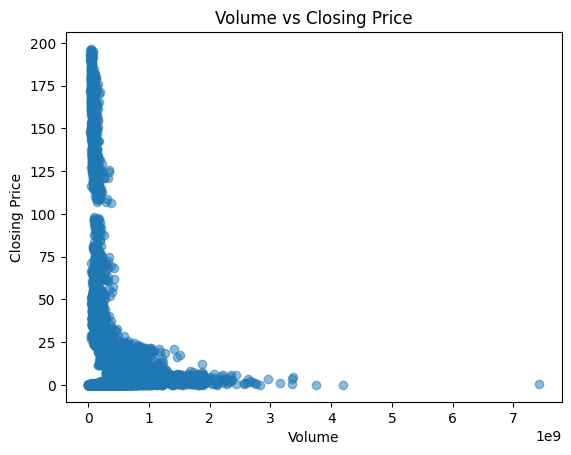

In [ ]:
plt.scatter(df['volume'], df['close'], alpha=0.5)
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.title("Volume vs Closing Price")
plt.show()


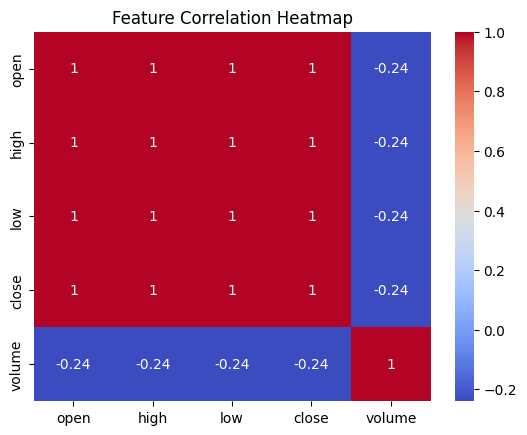

In [ ]:
sns.heatmap(df[['open','high','low','close','volume']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# Data Preprocessing

# Select Features and Target


In [ ]:
# Predict Closing Price
X=df[['open','high','low','volume']]
y=df['close']

# Train_Test_Split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

# Train The Model(Linear Regression)

In [ ]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

# Make Prediction

In [ ]:
y_pred =model.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred.head()

,Actual,Predicted
1766,0.308036,0.308117
7978,20.898571,20.766290
4184,0.117746,0.120090
2109,0.358259,0.359848
3181,0.332589,0.326958


# Mean Absolute Error (MAE)

In [ ]:
mae=mean_absolute_error(y_test, y_pred)
print("MAE=" , mae)

MAE= 0.09294293515659571


# Mean Squared Error (MSE)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
print("MSE=" , mse)

MSE= 0.09224328082401234


# R² (Coefficient of Determination)

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2=" , r2)

R2= 0.9999453951639893


# Actual Vs Predicted Stock Price

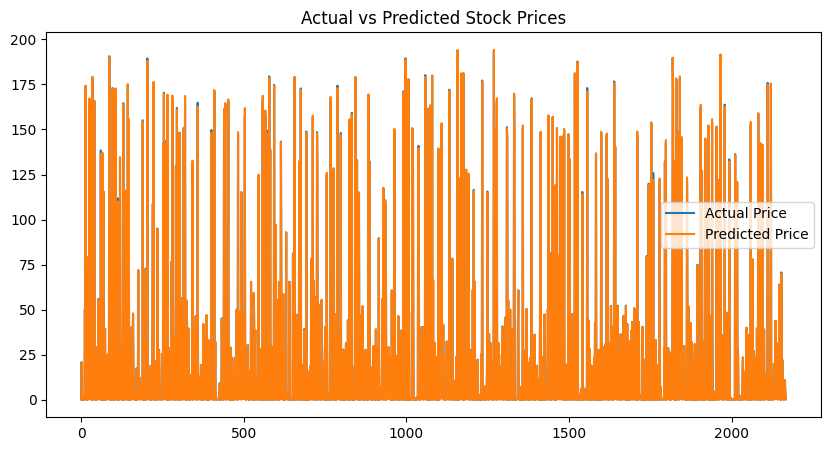

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title("Actual vs Predicted Stock Prices")
plt.legend()
plt.show()
